In [6]:
!pip install emoji

In [7]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
import emoji
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import requests
from io import BytesIO

In [8]:
# Emoji descriptions and corresponding emojis
emoji_meanings = {
    "blush smile": "😊",
    "sad": "😢",
    "heart": "❤️",
    "heart eyes": "😍",
    "embarrassed": "😅",
    "wink": "😉",
    "mad": "😡",
    "surprise": "😲",
    "laugh": "😂",
    "crying": "😭"
}

emojis =[" 😊 ", " 😢 ", " ❤️ ", " 😍 ", " 😅 ", " 😉 ", " 😡 ", " 😲 ", " 😂 ", " 😭 "]
#model.resize_token_embeddings(len(tokenizer))


In [9]:
# Load pre-trained BERT tokenizer and model
model = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModel.from_pretrained(model)
tokenizer.add_tokens(emojis)
model.resize_token_embeddings(len(tokenizer))

c:\Users\dwbru\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embeding dimension will be 30532. This might induce some performance reduction as *Tensor Cores* will not be available. For more details  about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc


Embedding(30532, 768)

In [10]:
# Generate embeddings for the new tokens
def get_token_embedding(token):
    inputs = tokenizer(token, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Collect embeddings for all emoji meanings
embeddings = []
labels = []
for emoji, meaning in emoji_meanings.items():
    embedding = get_token_embedding(emoji)
    embeddings.append(embedding)
    labels.append(meaning)

# Convert embeddings to a numpy array
import numpy as np
embeddings = np.array(embeddings)


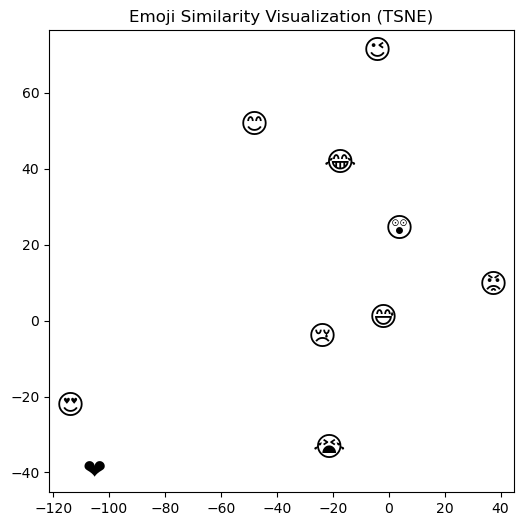

In [11]:
# Reduce dimensionality with TSNE BERT
embeddings_2d = TSNE(n_components=2, random_state=12, perplexity=3).fit_transform(embeddings)
# Plot the emojis
plt.figure(figsize=(6, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0)
for i, label in enumerate(labels):
    x, y = embeddings_2d[i]
    plt.text(x, y, label, fontsize=20, ha='center', va='center')
plt.title("Emoji Similarity Visualization (TSNE)", fontsize=12)
plt.axis("on")

plt.show()

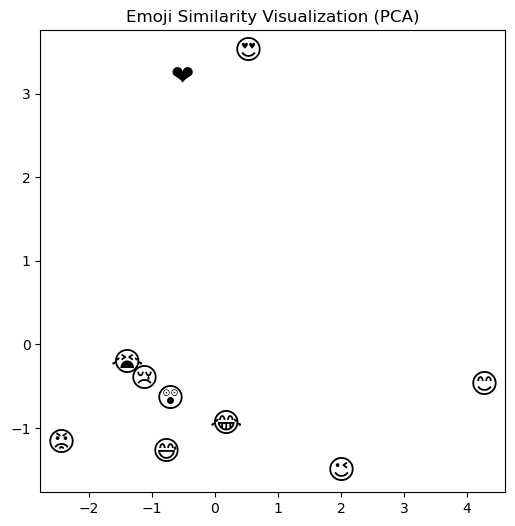

In [12]:
# Reduce dimensionality with PCA BERT
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)
# Plot the emojis
plt.figure(figsize=(6, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0)
for i, label in enumerate(labels):
    x, y = embeddings_2d[i]
    plt.text(x, y, label, fontsize=20, ha='center', va='center')
plt.title("Emoji Similarity Visualization (PCA)", fontsize=12)
plt.axis("on")

plt.show()

In [13]:
%pip install imojify
from imojify import imojify


Note: you may need to restart the kernel to use updated packages.


In [18]:
from matplotlib.offsetbox import OffsetImage,AnnotationBbox

def offset_image(cords, emoji, ax, zoom=0.05):
    img = plt.imread(imojify.get_img_path(emoji))
    im = OffsetImage(img, zoom=zoom)
    im.image.axes = ax
    ab = AnnotationBbox(im, (cords[0], cords[1]),  frameon=False, pad=0)
    ax.add_artist(ab)

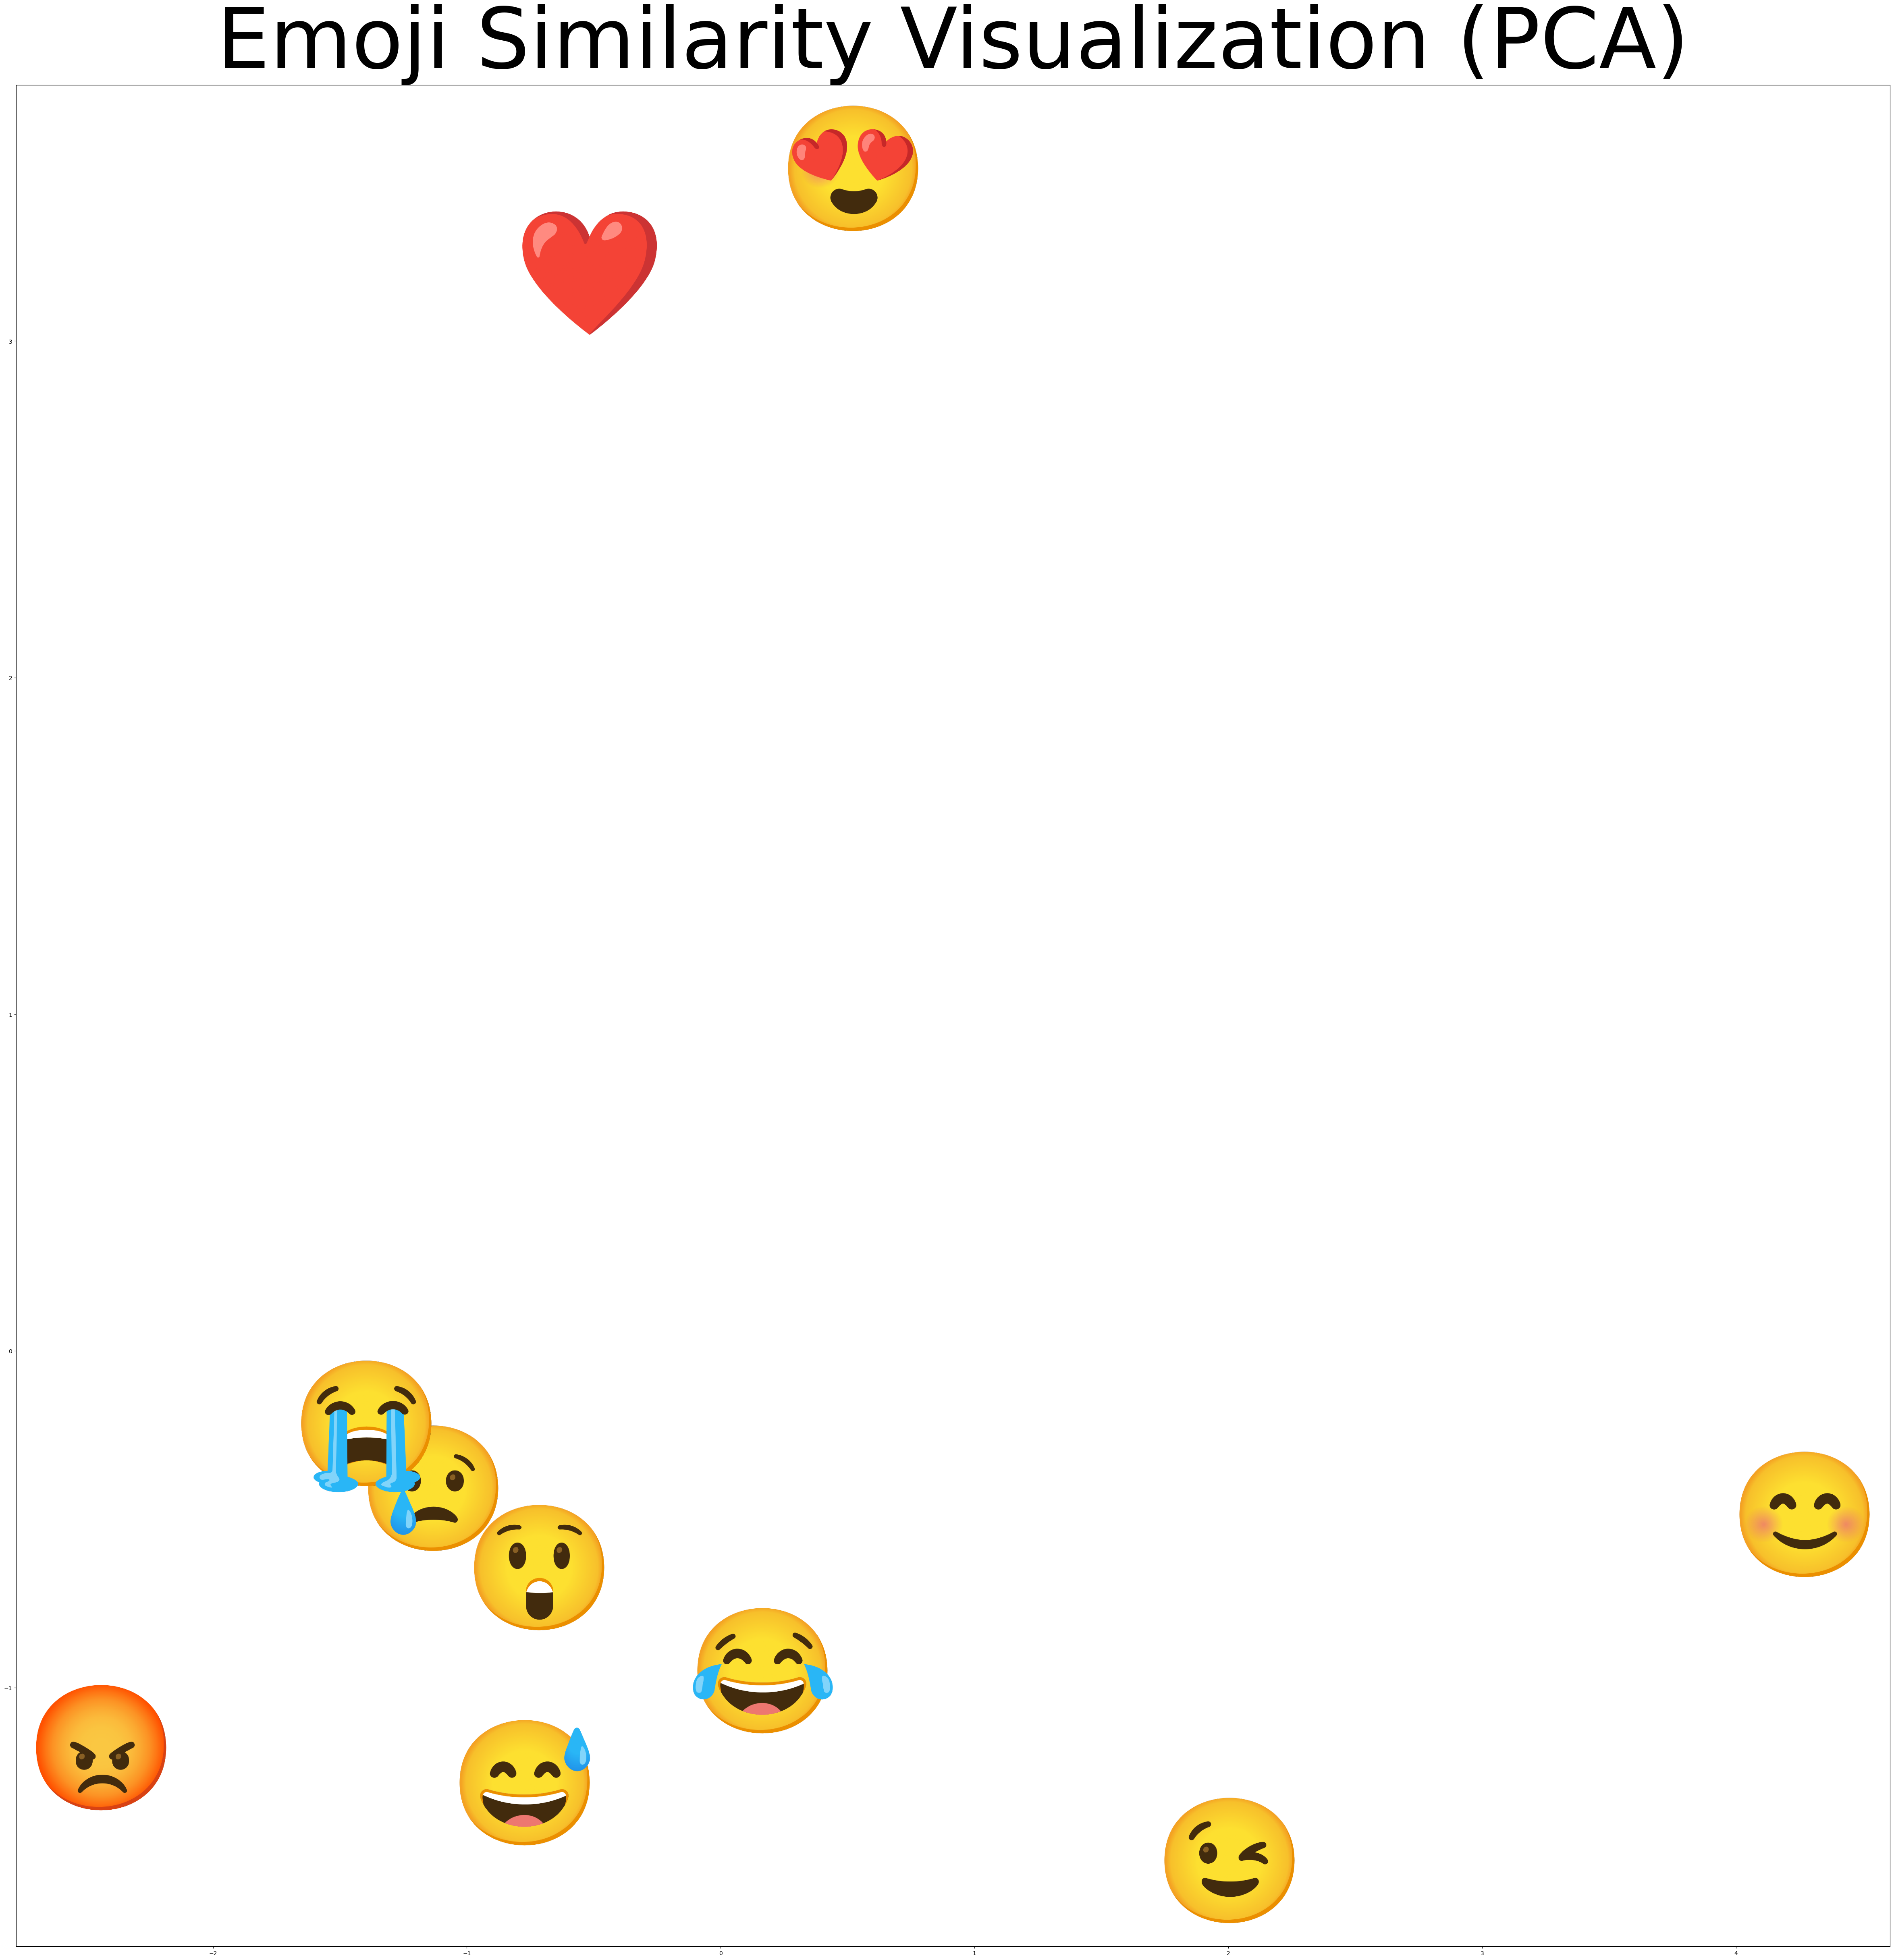

In [27]:
# Reduce dimensionality with PCA BERT
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)
# Plot the emojis
plt.figure(figsize=(60, 60))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0)
for i, label in enumerate(labels):
    x, y = embeddings_2d[i]
    # plt.text(x, y, label, fontsize=20, ha='center', va='center')
    offset_image((x, y), label, plt.gca(), zoom=.5)
plt.title("Emoji Similarity Visualization (PCA)", fontsize=150)
plt.axis("on")

plt.show()